In [53]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
)
from tensorflow.keras.optimizers import RMSprop
import keras_tuner as kt
import cv2
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
with h5py.File("Signs_Data_Training.h5", "r") as f:
    keys = list(f.keys())  
    print("Datasets:", keys)

    if keys:
        data = f[keys[0]][()] 
        
        print(f"Dataset: {keys[0]}")
        print("Shape:", data.shape)

        if len(data.shape) == 3: 
            plt.imshow(data)
            plt.axis("off")
            plt.show()
        elif len(data.shape) == 4:  
            plt.imshow(data[0]) 
            plt.axis("off")
            plt.show()
        else:
            print("Data is not in an image format.")

Datasets: ['list_classes', 'train_set_x', 'train_set_y']
Dataset: list_classes
Shape: (6,)
Data is not in an image format.


In [3]:
with h5py.File("Signs_Data_Testing.h5", "r") as f:
    keys2 = list(f.keys())  
    print("Datasets:", keys2)

    if keys:
        data2 = f[keys2[0]][()] 
        
        print(f"Dataset: {keys2[0]}")
        print("Shape:", data2.shape)

        if len(data2.shape) == 3: 
            plt.imshow(data)
            plt.axis("off")
            plt.show()
        elif len(data2.shape) == 4:  
            plt.imshow(data[0]) 
            plt.axis("off")
            plt.show()
        else:
            print("Data is not in an image format.")

Datasets: ['list_classes', 'test_set_x', 'test_set_y']
Dataset: list_classes
Shape: (6,)
Data is not in an image format.


In [4]:
with h5py.File("Signs_Data_Training.h5", "r") as f:
    print("Datasets:", list(f.keys()))

    if "train_set_x" in f:
        train_data_x = f["train_set_x"][()]  
        print("train_set_x shape:", train_data_x.shape)
    else:
        print("Dataset 'train_set_x' not found!")


Datasets: ['list_classes', 'train_set_x', 'train_set_y']
train_set_x shape: (1080, 64, 64, 3)


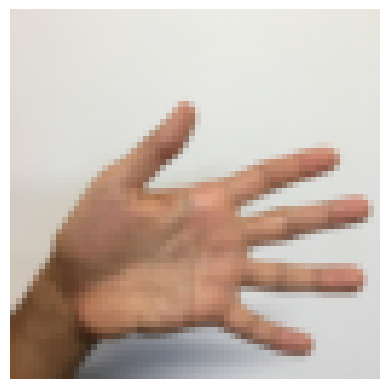

[[[227 220 214]
  [227 221 215]
  [227 222 215]
  ...
  [232 230 224]
  [231 229 222]
  [230 229 221]]

 [[227 221 214]
  [227 221 215]
  [228 221 215]
  ...
  [232 230 224]
  [231 229 222]
  [231 229 221]]

 [[227 221 214]
  [227 221 214]
  [227 221 215]
  ...
  [232 230 224]
  [231 229 223]
  [230 229 221]]

 ...

 [[119  81  51]
  [124  85  55]
  [127  87  58]
  ...
  [210 211 211]
  [211 212 210]
  [210 211 210]]

 [[119  79  51]
  [124  84  55]
  [126  85  56]
  ...
  [210 211 210]
  [210 211 210]
  [209 210 209]]

 [[119  81  51]
  [123  83  55]
  [122  82  54]
  ...
  [209 210 210]
  [209 210 209]
  [208 209 209]]]


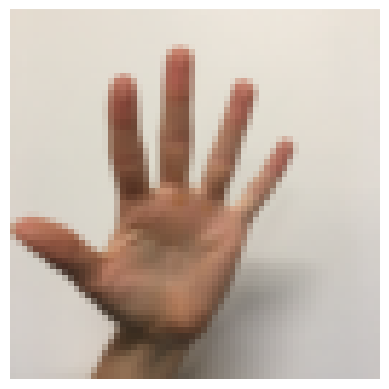

[[[228 219 208]
  [229 219 208]
  [228 220 208]
  ...
  [233 225 215]
  [233 225 215]
  [232 224 214]]

 [[228 219 207]
  [228 220 208]
  [228 220 208]
  ...
  [233 225 216]
  [233 225 215]
  [232 224 214]]

 [[228 219 207]
  [228 220 208]
  [228 220 208]
  ...
  [233 225 215]
  [233 225 215]
  [232 224 214]]

 ...

 [[207 202 199]
  [207 203 199]
  [208 203 199]
  ...
  [200 196 194]
  [201 196 194]
  [200 196 194]]

 [[205 200 197]
  [206 202 198]
  [207 202 198]
  ...
  [199 195 194]
  [200 196 194]
  [201 196 194]]

 [[203 199 195]
  [205 200 196]
  [205 200 196]
  ...
  [199 194 194]
  [200 195 193]
  [201 196 193]]]


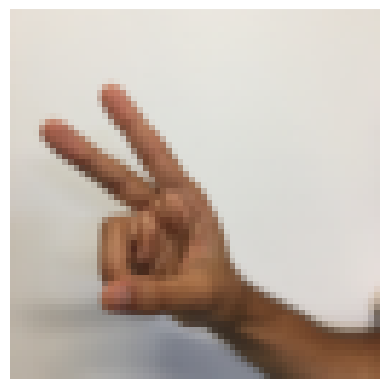

[[[230 222 213]
  [230 223 213]
  [230 224 215]
  ...
  [228 222 214]
  [228 222 213]
  [227 221 212]]

 [[230 222 213]
  [230 223 214]
  [230 224 215]
  ...
  [228 222 214]
  [228 222 213]
  [227 222 212]]

 [[230 222 213]
  [230 223 214]
  [229 223 214]
  ...
  [228 222 214]
  [228 222 214]
  [228 222 213]]

 ...

 [[186 177 165]
  [186 177 166]
  [185 176 165]
  ...
  [139  90  57]
  [133  86  54]
  [131  84  52]]

 [[185 177 165]
  [185 177 165]
  [185 176 165]
  ...
  [145  97  64]
  [139  93  59]
  [137  89  57]]

 [[185 176 164]
  [185 176 164]
  [185 176 165]
  ...
  [150 103  69]
  [144  98  64]
  [142  94  60]]]


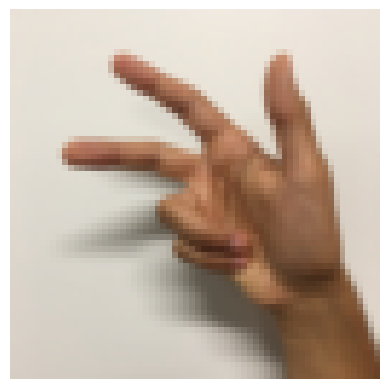

[[[233 225 215]
  [233 225 216]
  [233 226 216]
  ...
  [236 227 218]
  [235 227 217]
  [234 227 216]]

 [[233 226 215]
  [233 225 216]
  [233 226 216]
  ...
  [235 227 218]
  [235 227 218]
  [234 227 216]]

 [[233 226 215]
  [233 226 216]
  [233 226 216]
  ...
  [235 227 218]
  [235 227 217]
  [234 226 216]]

 ...

 [[215 207 197]
  [215 207 197]
  [214 206 197]
  ...
  [115  72  42]
  [112  70  41]
  [109  69  42]]

 [[214 206 196]
  [214 206 196]
  [214 206 196]
  ...
  [115  72  41]
  [112  69  41]
  [107  66  40]]

 [[212 205 194]
  [213 205 195]
  [213 206 196]
  ...
  [116  74  43]
  [113  71  41]
  [105  66  38]]]


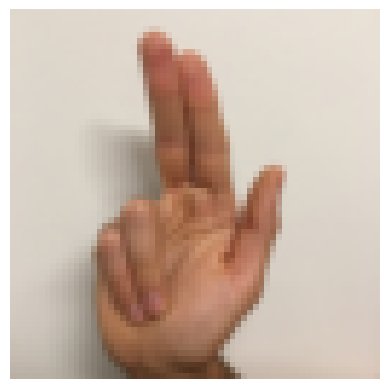

[[[224 215 204]
  [224 215 204]
  [224 215 204]
  ...
  [233 224 214]
  [233 224 214]
  [233 224 213]]

 [[225 216 205]
  [225 216 204]
  [225 216 205]
  ...
  [233 224 214]
  [233 224 214]
  [232 224 212]]

 [[225 216 205]
  [225 216 205]
  [224 216 205]
  ...
  [233 224 214]
  [233 224 214]
  [232 224 212]]

 ...

 [[191 181 170]
  [192 182 171]
  [192 182 171]
  ...
  [218 202 190]
  [218 201 188]
  [217 200 186]]

 [[188 179 168]
  [189 179 168]
  [189 179 168]
  ...
  [217 201 187]
  [217 200 186]
  [216 199 184]]

 [[185 175 165]
  [186 176 166]
  [185 175 165]
  ...
  [216 198 184]
  [216 197 183]
  [211 192 177]]]


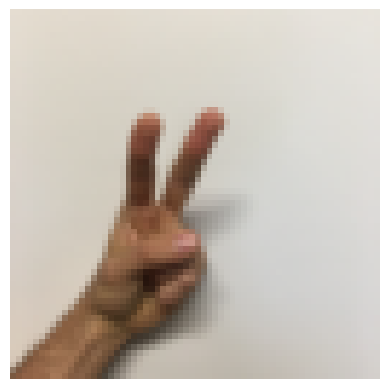

[[[229 221 209]
  [229 221 209]
  [228 220 208]
  ...
  [232 227 220]
  [232 228 220]
  [231 228 220]]

 [[228 220 209]
  [228 220 208]
  [228 220 208]
  ...
  [231 227 221]
  [232 228 221]
  [231 227 220]]

 [[228 220 208]
  [228 220 208]
  [227 220 208]
  ...
  [231 227 221]
  [231 227 221]
  [232 227 220]]

 ...

 [[198 182 165]
  [146 123 103]
  [121  86  62]
  ...
  [210 206 202]
  [212 208 204]
  [212 209 205]]

 [[142 119  99]
  [122  87  63]
  [134  91  65]
  ...
  [209 205 202]
  [211 207 203]
  [212 208 204]]

 [[123  89  64]
  [133  90  63]
  [144  98  70]
  ...
  [209 205 201]
  [211 206 203]
  [211 207 203]]]


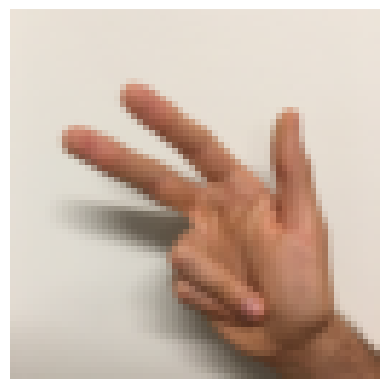

[[[236 227 216]
  [235 227 216]
  [234 227 216]
  ...
  [237 228 218]
  [236 228 218]
  [236 228 218]]

 [[236 227 216]
  [235 227 216]
  [234 227 216]
  ...
  [236 228 218]
  [236 228 218]
  [236 228 217]]

 [[236 227 216]
  [235 227 216]
  [234 227 216]
  ...
  [236 228 218]
  [236 228 218]
  [236 228 217]]

 ...

 [[196 187 177]
  [197 188 178]
  [196 188 178]
  ...
  [135  89  64]
  [129  84  59]
  [121  79  55]]

 [[193 184 174]
  [194 185 175]
  [194 185 175]
  ...
  [137  90  66]
  [135  88  63]
  [130  84  59]]

 [[190 182 171]
  [191 182 172]
  [192 183 173]
  ...
  [140  93  69]
  [145  97  71]
  [135  88  61]]]


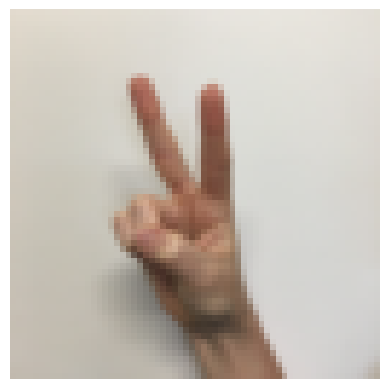

[[[226 218 206]
  [227 219 207]
  [227 219 207]
  ...
  [227 223 216]
  [227 223 216]
  [226 223 213]]

 [[225 217 204]
  [225 218 205]
  [225 218 206]
  ...
  [227 223 216]
  [227 222 215]
  [226 222 213]]

 [[224 216 203]
  [224 216 204]
  [223 216 204]
  ...
  [227 223 216]
  [226 222 215]
  [226 222 213]]

 ...

 [[195 188 177]
  [195 188 177]
  [195 187 177]
  ...
  [200 198 196]
  [195 191 188]
  [189 184 176]]

 [[194 186 175]
  [194 186 175]
  [194 186 176]
  ...
  [196 192 190]
  [190 184 178]
  [185 177 167]]

 [[193 185 174]
  [193 186 175]
  [193 186 175]
  ...
  [192 188 183]
  [186 179 171]
  [180 172 160]]]


In [5]:
plt.imshow(train_data_x[0]) 
plt.axis("off")
plt.show()
print(train_data_x[0])

plt.imshow(train_data_x[3]) 
plt.axis("off")
plt.show()
print(train_data_x[3])

plt.imshow(train_data_x[6]) 
plt.axis("off")
plt.show()
print(train_data_x[6])

plt.imshow(train_data_x[100]) 
plt.axis("off")
plt.show()
print(train_data_x[100])

plt.imshow(train_data_x[506]) 
plt.axis("off")
plt.show()
print(train_data_x[506])

plt.imshow(train_data_x[455]) 
plt.axis("off")
plt.show()
print(train_data_x[455])

plt.imshow(train_data_x[700]) 
plt.axis("off")
plt.show()
print(train_data_x[700])

plt.imshow(train_data_x[999]) 
plt.axis("off")
plt.show()
print(train_data_x[999])


In [6]:
with h5py.File("Signs_Data_Training.h5", "r") as f1:
    print("Datasets:", list(f1.keys()))

    if "train_set_y" in f1:
        train_data_y = f1["train_set_y"][()]  
        print("train_set_y shape:", train_data_y.shape)
    else:
        print("Dataset 'train_set_y' not found!")


Datasets: ['list_classes', 'train_set_x', 'train_set_y']
train_set_y shape: (1080,)


In [7]:
print(train_data_y[0])
print(train_data_y[3])
print(train_data_y[6])
print(train_data_y[100])
print(train_data_y[506])
print(train_data_y[455])
print(train_data_y[700])
print(train_data_y[99])

5
5
2
3
3
2
3
5


In [8]:
import h5py

with h5py.File("Signs_Data_Training.h5", "r") as f:
    for key in f.keys():
        if key.endswith(".csv"):  
            print(f"CSV file found: {key}")
            data = f[key][()]
            print("Data sample:", data[:5])  
            break
    else:
        print("No CSV file found in the HDF5 file.")


No CSV file found in the HDF5 file.


In [9]:
print(train_data_x.shape)

(1080, 64, 64, 3)


In [10]:
print(train_data_x[0].shape)

(64, 64, 3)


In [19]:
base_dir = "sign_language_dataset"
os.makedirs(base_dir, exist_ok=True)

for label in range(6):
    os.makedirs(os.path.join(base_dir, str(label)), exist_ok=True)

In [20]:
def save_images(X, Y):
    for i, (pixels, label) in enumerate(zip(X, Y)):
        pixels = np.array(pixels) 
        
        if pixels.shape != (64, 64): 
            pixels = cv2.resize(pixels, (64, 64))

        img = Image.fromarray(np.uint8(pixels)) 
        img_path = os.path.join(base_dir, str(label), f"img_{i}.png")
        img.save(img_path)

save_images(train_data_x, train_data_y)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def augment_images(label):
    folder_path = os.path.join(base_dir, str(label))
    save_path = folder_path  

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = np.expand_dims(img, axis=0)  

        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=save_path, save_prefix="aug", save_format="png"):
            i += 1
            if i > 5:  
                break

for label in range(6):
    augment_images(label)


In [22]:
image_paths = []
labels = []

for label in range(6):
    folder_path = os.path.join(base_dir, str(label))
    for img_name in os.listdir(folder_path):
        image_paths.append(os.path.join(folder_path, img_name))
        labels.append(label)

df = pd.DataFrame({"image_path": image_paths, "label": labels})
df.to_csv("sign_language_dataset.csv", index=False)


In [23]:
df = pd.read_csv("sign_language_dataset.csv")

In [24]:
df.head()

,image_path,label
0,sign_language_dataset/0/aug_0_5662.png,0
1,sign_language_dataset/0/aug_0_1376.png,0
2,sign_language_dataset/0/aug_0_467.png,0
3,sign_language_dataset/0/aug_0_4226.png,0
4,sign_language_dataset/0/img_881.png,0


In [25]:
df.shape

(7216, 2)

In [26]:
def load_images(csv_path, img_size=(64, 64)):
    df = pd.read_csv(csv_path)
    images = []
    labels = []

    for _, row in df.iterrows():
        img = cv2.imread(row["image_path"], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        img = img / 255.0  
        images.append(img)
        labels.append(row["label"])

    return np.array(images).reshape(-1, 64, 64, 1), np.array(labels)

X_train, y_train = load_images("sign_language_dataset.csv")

In [27]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential([
        layers.Conv2D(hp.Int("conv1_units", min_value=32, max_value=128, step=32), (3, 3), activation="relu", input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int("conv2_units", min_value=64, max_value=256, step=64), (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(hp.Int("dense_units", min_value=128, max_value=512, step=128), activation="relu"),
        layers.Dropout(hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(6, activation="softmax")
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", [0.001, 0.0005, 0.0001])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=5,
    factor=3,
    directory="tuner_results",
    project_name="sign_language"
)

tuner.search(X_train, y_train, epochs=2, validation_split=0.2)


Trial 10 Complete [00h 02m 15s]
val_accuracy: 0.11426592618227005

Best val_accuracy So Far: 0.12396121770143509
Total elapsed time: 00h 17m 18s


In [35]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 192)    │        55,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 37632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,817,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,873,606 (18.59 MB)

 Trainable params: 4,873,606 (18.59 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
input_shape = (64, 64, 3)  

model = Sequential([
    Input(shape=input_shape), 
    Conv2D(32, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(192, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 192)    │        55,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 37632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,817,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,874,182 (18.59 MB)

 Trainable params: 4,874,182 (18.59 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
dataset_path = "sign_language_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 5774 images belonging to 6 classes.
Found 1442 images belonging to 6 classes.


In [69]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.2833 - loss: 1.6801 - val_accuracy: 0.3994 - val_loss: 1.4599
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 24s 133ms/step - accuracy: 0.4492 - loss: 1.3545 - val_accuracy: 0.4965 - val_loss: 1.2600
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 26s 141ms/step - accuracy: 0.5445 - loss: 1.1484 - val_accuracy: 0.5381 - val_loss: 1.1330
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.6007 - loss: 1.0343 - val_accuracy: 0.5791 - val_loss: 1.1063
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.6527 - loss: 0.9087 - val_accuracy: 0.6193 - val_loss: 1.0212
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.6912 - loss: 0.8127 - val_accuracy: 0.6456 - val_loss: 0.9671
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 23s 126ms/step - accuracy: 0.7169 - loss: 0.7593 - val_accuracy: 0.6692 - val_loss: 0.9407
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.7419 - loss: 0